### EDA

In [463]:
# Librerias para la exploracion y transformaciones basicas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [464]:
# Origen de dato del dataset
df = pd.read_csv("C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/Automobile_data.csv")

In [465]:
# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(205, 26)

In [466]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [467]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [468]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [469]:
# Reemplazo de valores no deseados con NaN
# Identificar columnas categóricas con valores mayormente numéricos
potential_numeric_columns = []

# Verificar cada columna categórica
for col in df.select_dtypes(include='object').columns:
    # Contar cuántos valores en la columna son numéricos
    numeric_values = pd.to_numeric(df[col], errors='coerce').notna()
    numeric_percentage = numeric_values.mean() * 100  # Porcentaje de valores numéricos en la columna
    
    # Si más del 80% de los valores son numéricos, la consideramos como columna potencialmente numérica
    if numeric_percentage > 80:
        potential_numeric_columns.append(col)
        print(f"La columna '{col}' tiene un {numeric_percentage:.2f}% de valores numéricos y podría ser tratada como numérica.")

# Convertir solo las columnas identificadas a valores numéricos, reemplazando valores no numéricos con NaN
for col in potential_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Solo en estas columnas, los no numéricos se convierten en NaN

print("\nColumnas tratadas como numéricas:", potential_numeric_columns)

La columna 'bore' tiene un 98.05% de valores numéricos y podría ser tratada como numérica.
La columna 'stroke' tiene un 98.05% de valores numéricos y podría ser tratada como numérica.
La columna 'horsepower' tiene un 99.02% de valores numéricos y podría ser tratada como numérica.
La columna 'peak-rpm' tiene un 99.02% de valores numéricos y podría ser tratada como numérica.
La columna 'price' tiene un 98.05% de valores numéricos y podría ser tratada como numérica.

Columnas tratadas como numéricas: ['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']


In [470]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [471]:
# Estadísticas descriptivas de columnas categóricas
df.describe(include=['object'])  # Muestra estadísticas descriptivas (conteo, valores únicos, categoría más frecuente) para variables categóricas.

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,205,205,205,205,205,205,205,205
unique,52,22,2,2,3,5,3,2,7,7,8
top,?,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,41,32,185,168,114,96,120,202,148,159,94


In [472]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [473]:
# Imputar datos nulos con KNN (si los datos seguian una correlatividad, se podría hacer con interpolate)(sino, se podría utilizar la media o mediana)(para casos mas complejos knn)
from sklearn.impute import KNNImputer

# Selecciona solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Aplica la imputación solo a las columnas numéricas
imputer = KNNImputer(n_neighbors=5)
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])


In [474]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [475]:
# Eliminar los outliers de una columna específica
def eliminar_outliers_columna(df, columna):
    # Copiar el dataframe original para mantener el original sin cambios
    df_sin_outliers = df.copy()
    
    # Verificar si la columna está en el dataframe y si es numérica
    if columna in df_sin_outliers.select_dtypes(include=['float64', 'int64']).columns:
        # Calcular el primer y tercer cuartil, y el rango intercuartil (IQR)
        Q1 = df_sin_outliers[columna].quantile(0.25)
        Q3 = df_sin_outliers[columna].quantile(0.75)
        IQR = Q3 - Q1

        # Definir los límites inferior y superior para los outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrar el dataframe excluyendo los outliers para la columna indicada
        df_sin_outliers = df_sin_outliers[(df_sin_outliers[columna] >= lower_bound) & 
                                          (df_sin_outliers[columna] <= upper_bound)]
    else:
        print(f"La columna '{columna}' no existe o no es numérica.")
    
    return df_sin_outliers

# Ejecutar la función para obtener el dataframe sin outliers en una columna específica
columna_objetivo = 'price'  # Especifica la columna deseada
df_sin_outliers = eliminar_outliers_columna(df, columna_objetivo)

# Verificar la cantidad de filas antes y después de la limpieza
print(f"Dataframe original: {df.shape}")
print(f"Dataframe sin outliers en '{columna_objetivo}': {df_sin_outliers.shape}")

Dataframe original: (205, 26)
Dataframe sin outliers en 'price': (190, 26)


In [476]:
# Inspección de nombres de columnas
df_sin_outliers.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [477]:
df_limpio = df_sin_outliers.drop('normalized-losses', axis=1)

In [478]:
# Identificación de valores duplicados
df_limpio.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(0)

In [479]:
# En caso de haber duplicados y que corresponda la eliminación de los mismos
# df.drop_duplicates()

In [480]:
# Distribución de tipos de datos
df_limpio.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

float64    15
object     10
Name: count, dtype: int64

In [481]:
# Distribución de valores en columnas categóricas
for column in df_limpio.select_dtypes(include='object').columns:
    print(df_limpio[column].value_counts())  # Muestra la frecuencia de cada categoría en las columnas categóricas.

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
plymouth          7
audi              7
saab              6
bmw               5
isuzu             4
chevrolet         3
alfa-romero       3
mercedes-benz     3
renault           2
mercury           1
porsche           1
Name: count, dtype: int64
fuel-type
gas       171
diesel     19
Name: count, dtype: int64
aspiration
std      154
turbo     36
Name: count, dtype: int64
num-of-doors
four    107
two      81
?         2
Name: count, dtype: int64
body-style
sedan          87
hatchback      69
wagon          25
hardtop         5
convertible     4
Name: count, dtype: int64
drive-wheels
fwd    120
rwd     61
4wd      9
Name: count, dtype: int64
engine-location
front    190
Name: count, dtype: int64
engine-type
ohc      144
l         12
ohcf      12
dohc      10
ohcv       8
rotor      4
Nam

In [482]:
# Análisis de tendencia temporal (para columnas de fecha/hora)
if 'fecha' in df_limpio.columns:  # Reemplaza 'fecha' con el nombre de la columna de fecha si aplica
    df_limpio['fecha'] = pd.to_datetime(df_limpio['fecha'])  # Convierte a tipo datetime si aún no lo está
    df_limpio.set_index('fecha', inplace=True)  # Establece la columna de fecha como índice
    df_limpio.resample('M').mean().plot()  # Muestra la tendencia mensual en variables numéricas

array([[<Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheel-base'}>,
        <Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'width'}>],
       [<Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'curb-weight'}>,
        <Axes: title={'center': 'engine-size'}>,
        <Axes: title={'center': 'bore'}>],
       [<Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compression-ratio'}>,
        <Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'peak-rpm'}>],
       [<Axes: title={'center': 'city-mpg'}>,
        <Axes: title={'center': 'highway-mpg'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

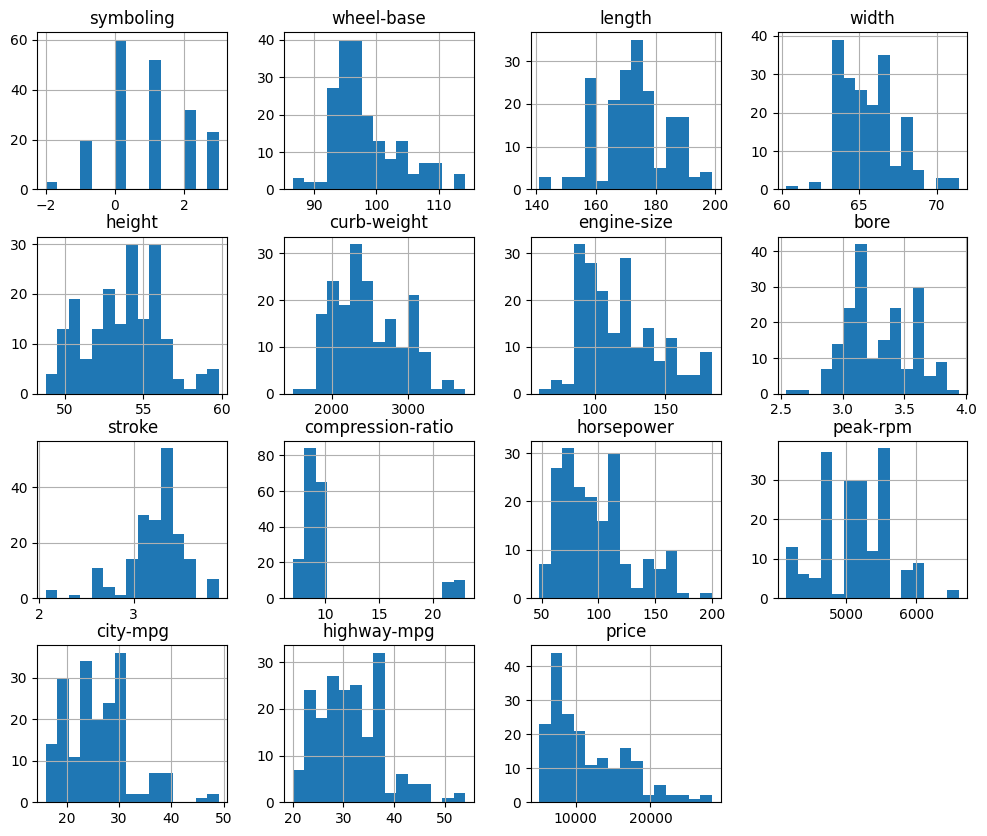

In [483]:
# Visualización de distribuciones numéricas
df_limpio.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.

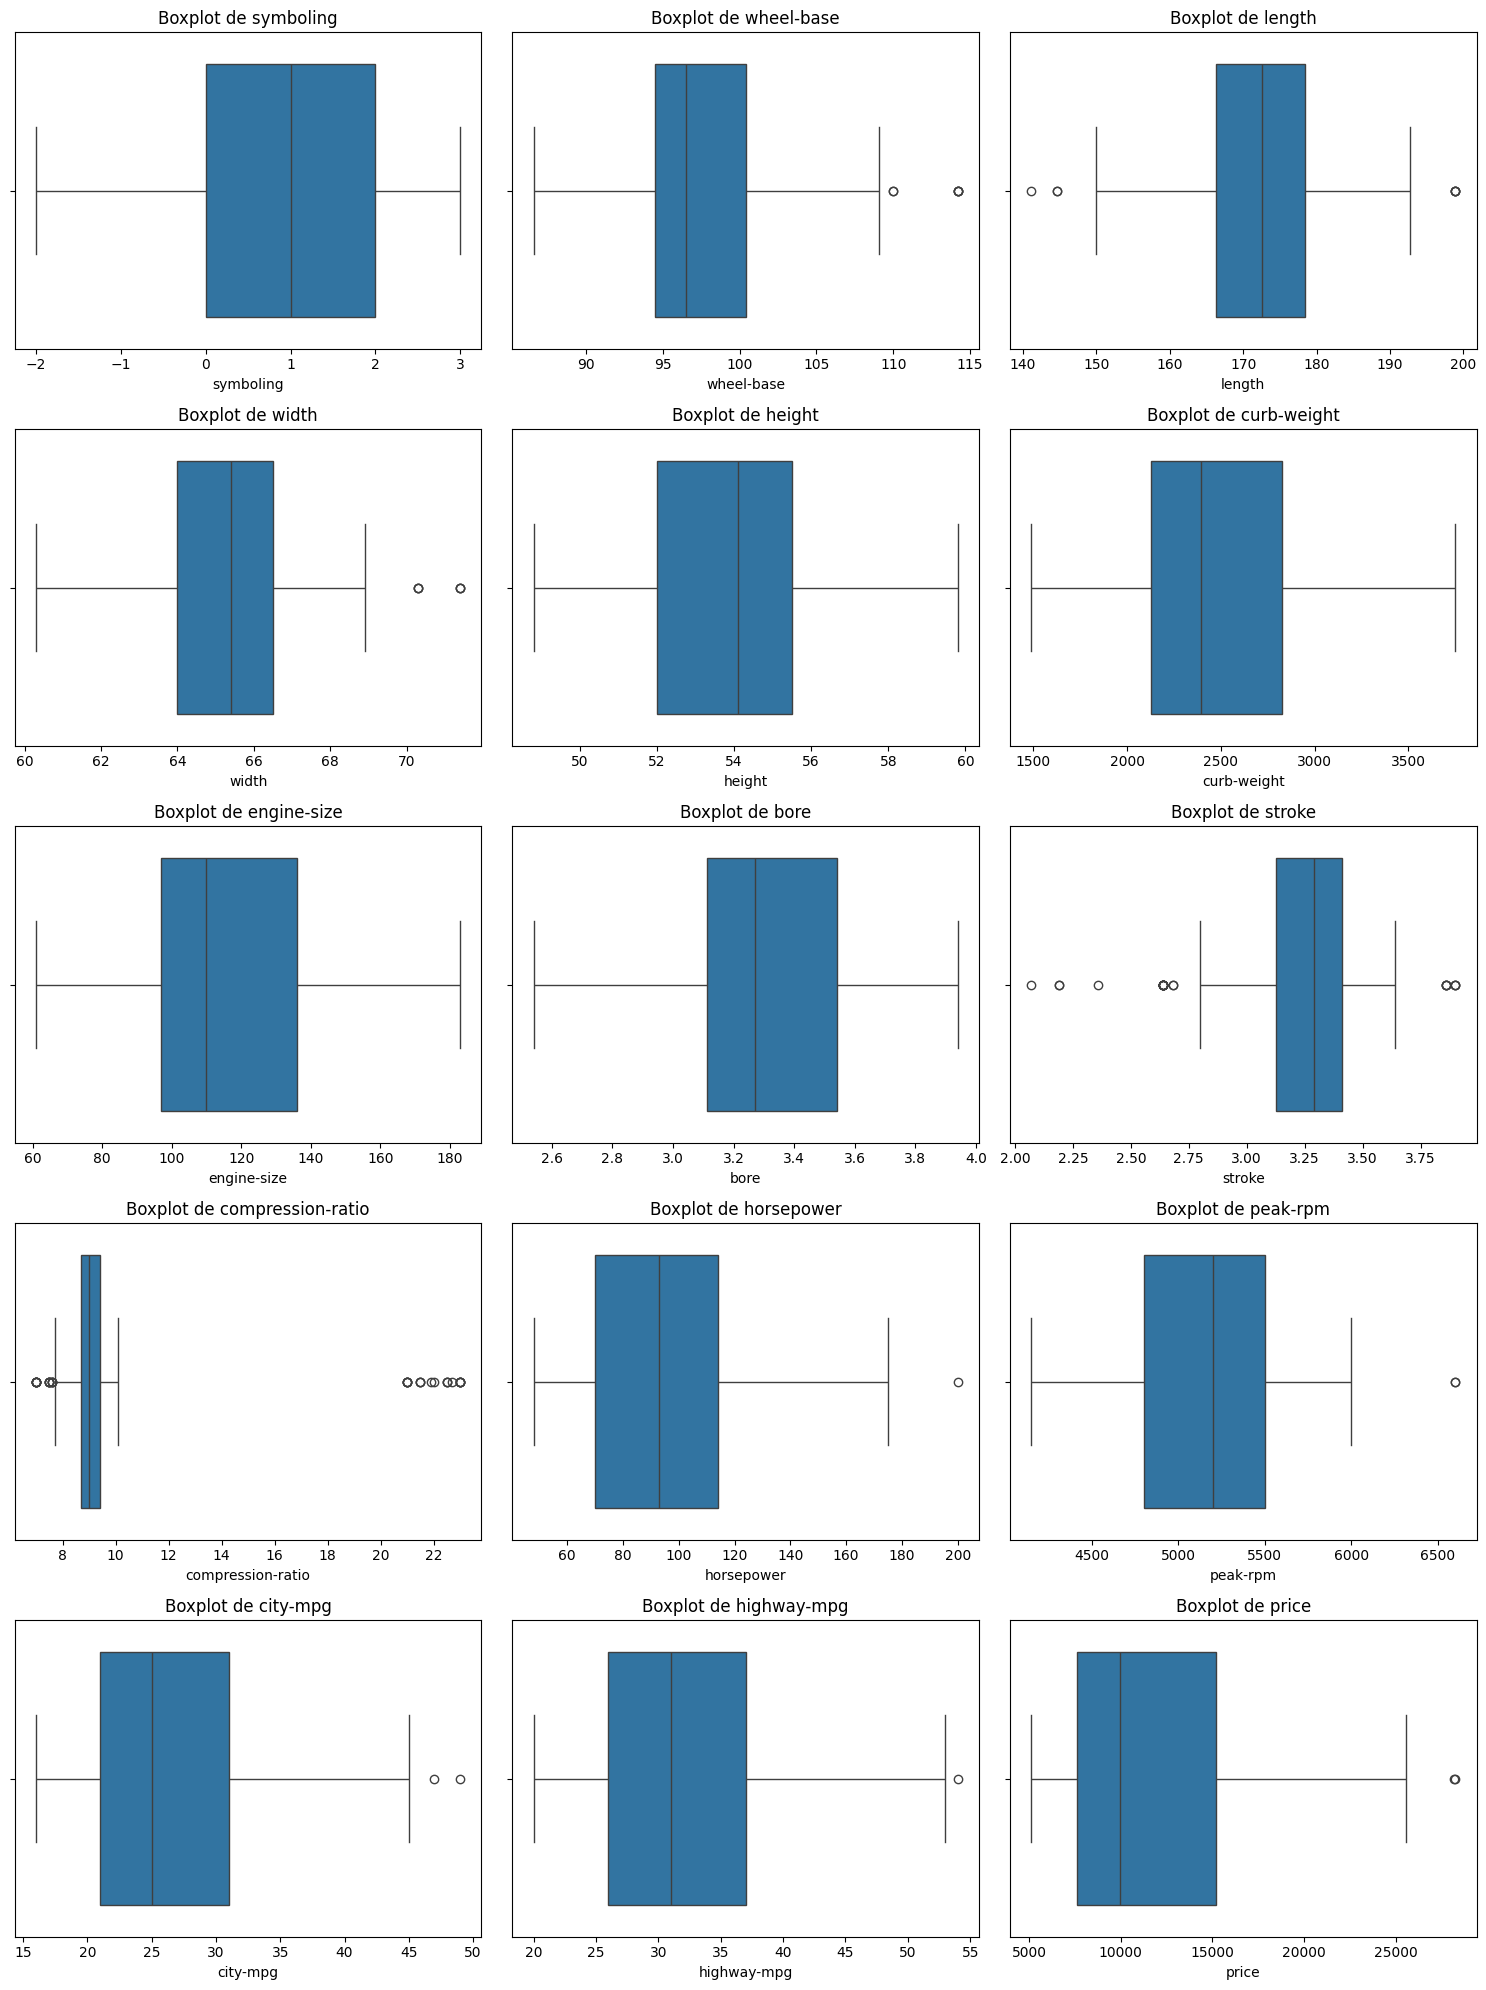

In [484]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df_limpio.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df_limpio, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [485]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df_limpio.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_limpio[column].quantile(0.25)
    Q3 = df_limpio[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df_limpio[(df_limpio[column] < (Q1 - 1.5 * IQR)) | (df_limpio[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")


symboling - Número de outliers: 0

wheel-base - Número de outliers: 6

length - Número de outliers: 7

width - Número de outliers: 6

height - Número de outliers: 0

curb-weight - Número de outliers: 0

engine-size - Número de outliers: 0

bore - Número de outliers: 0

stroke - Número de outliers: 24

compression-ratio - Número de outliers: 35

horsepower - Número de outliers: 1

peak-rpm - Número de outliers: 2

city-mpg - Número de outliers: 2

highway-mpg - Número de outliers: 1

price - Número de outliers: 2


<Axes: >

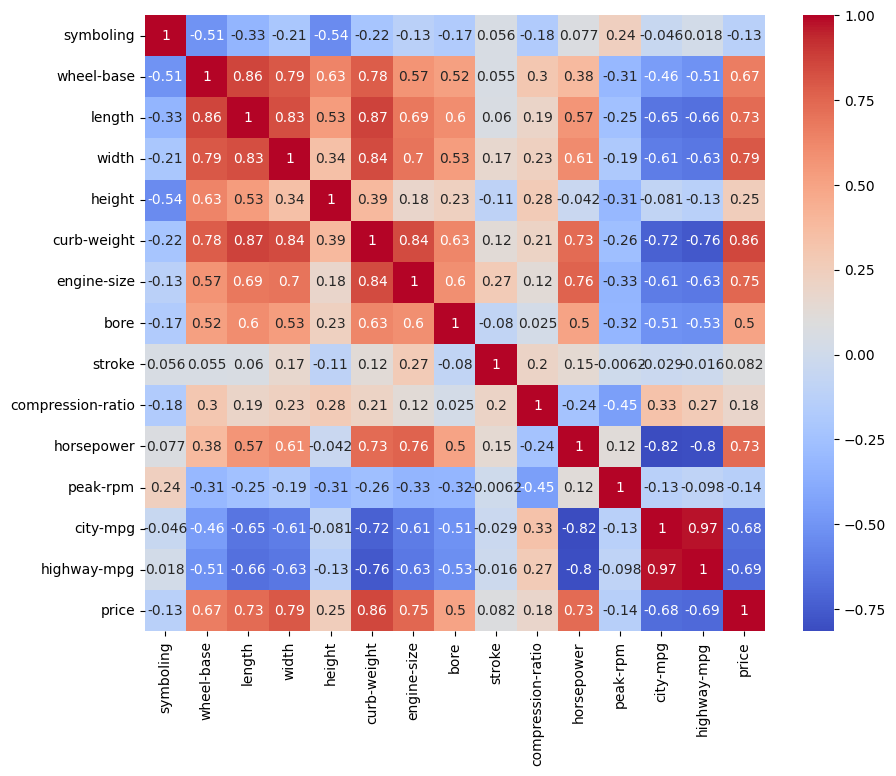

In [486]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df_limpio.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

In [487]:
df_limpio = df_limpio.drop(['symboling','height','stroke','compression-ratio','peak-rpm'], axis=True)

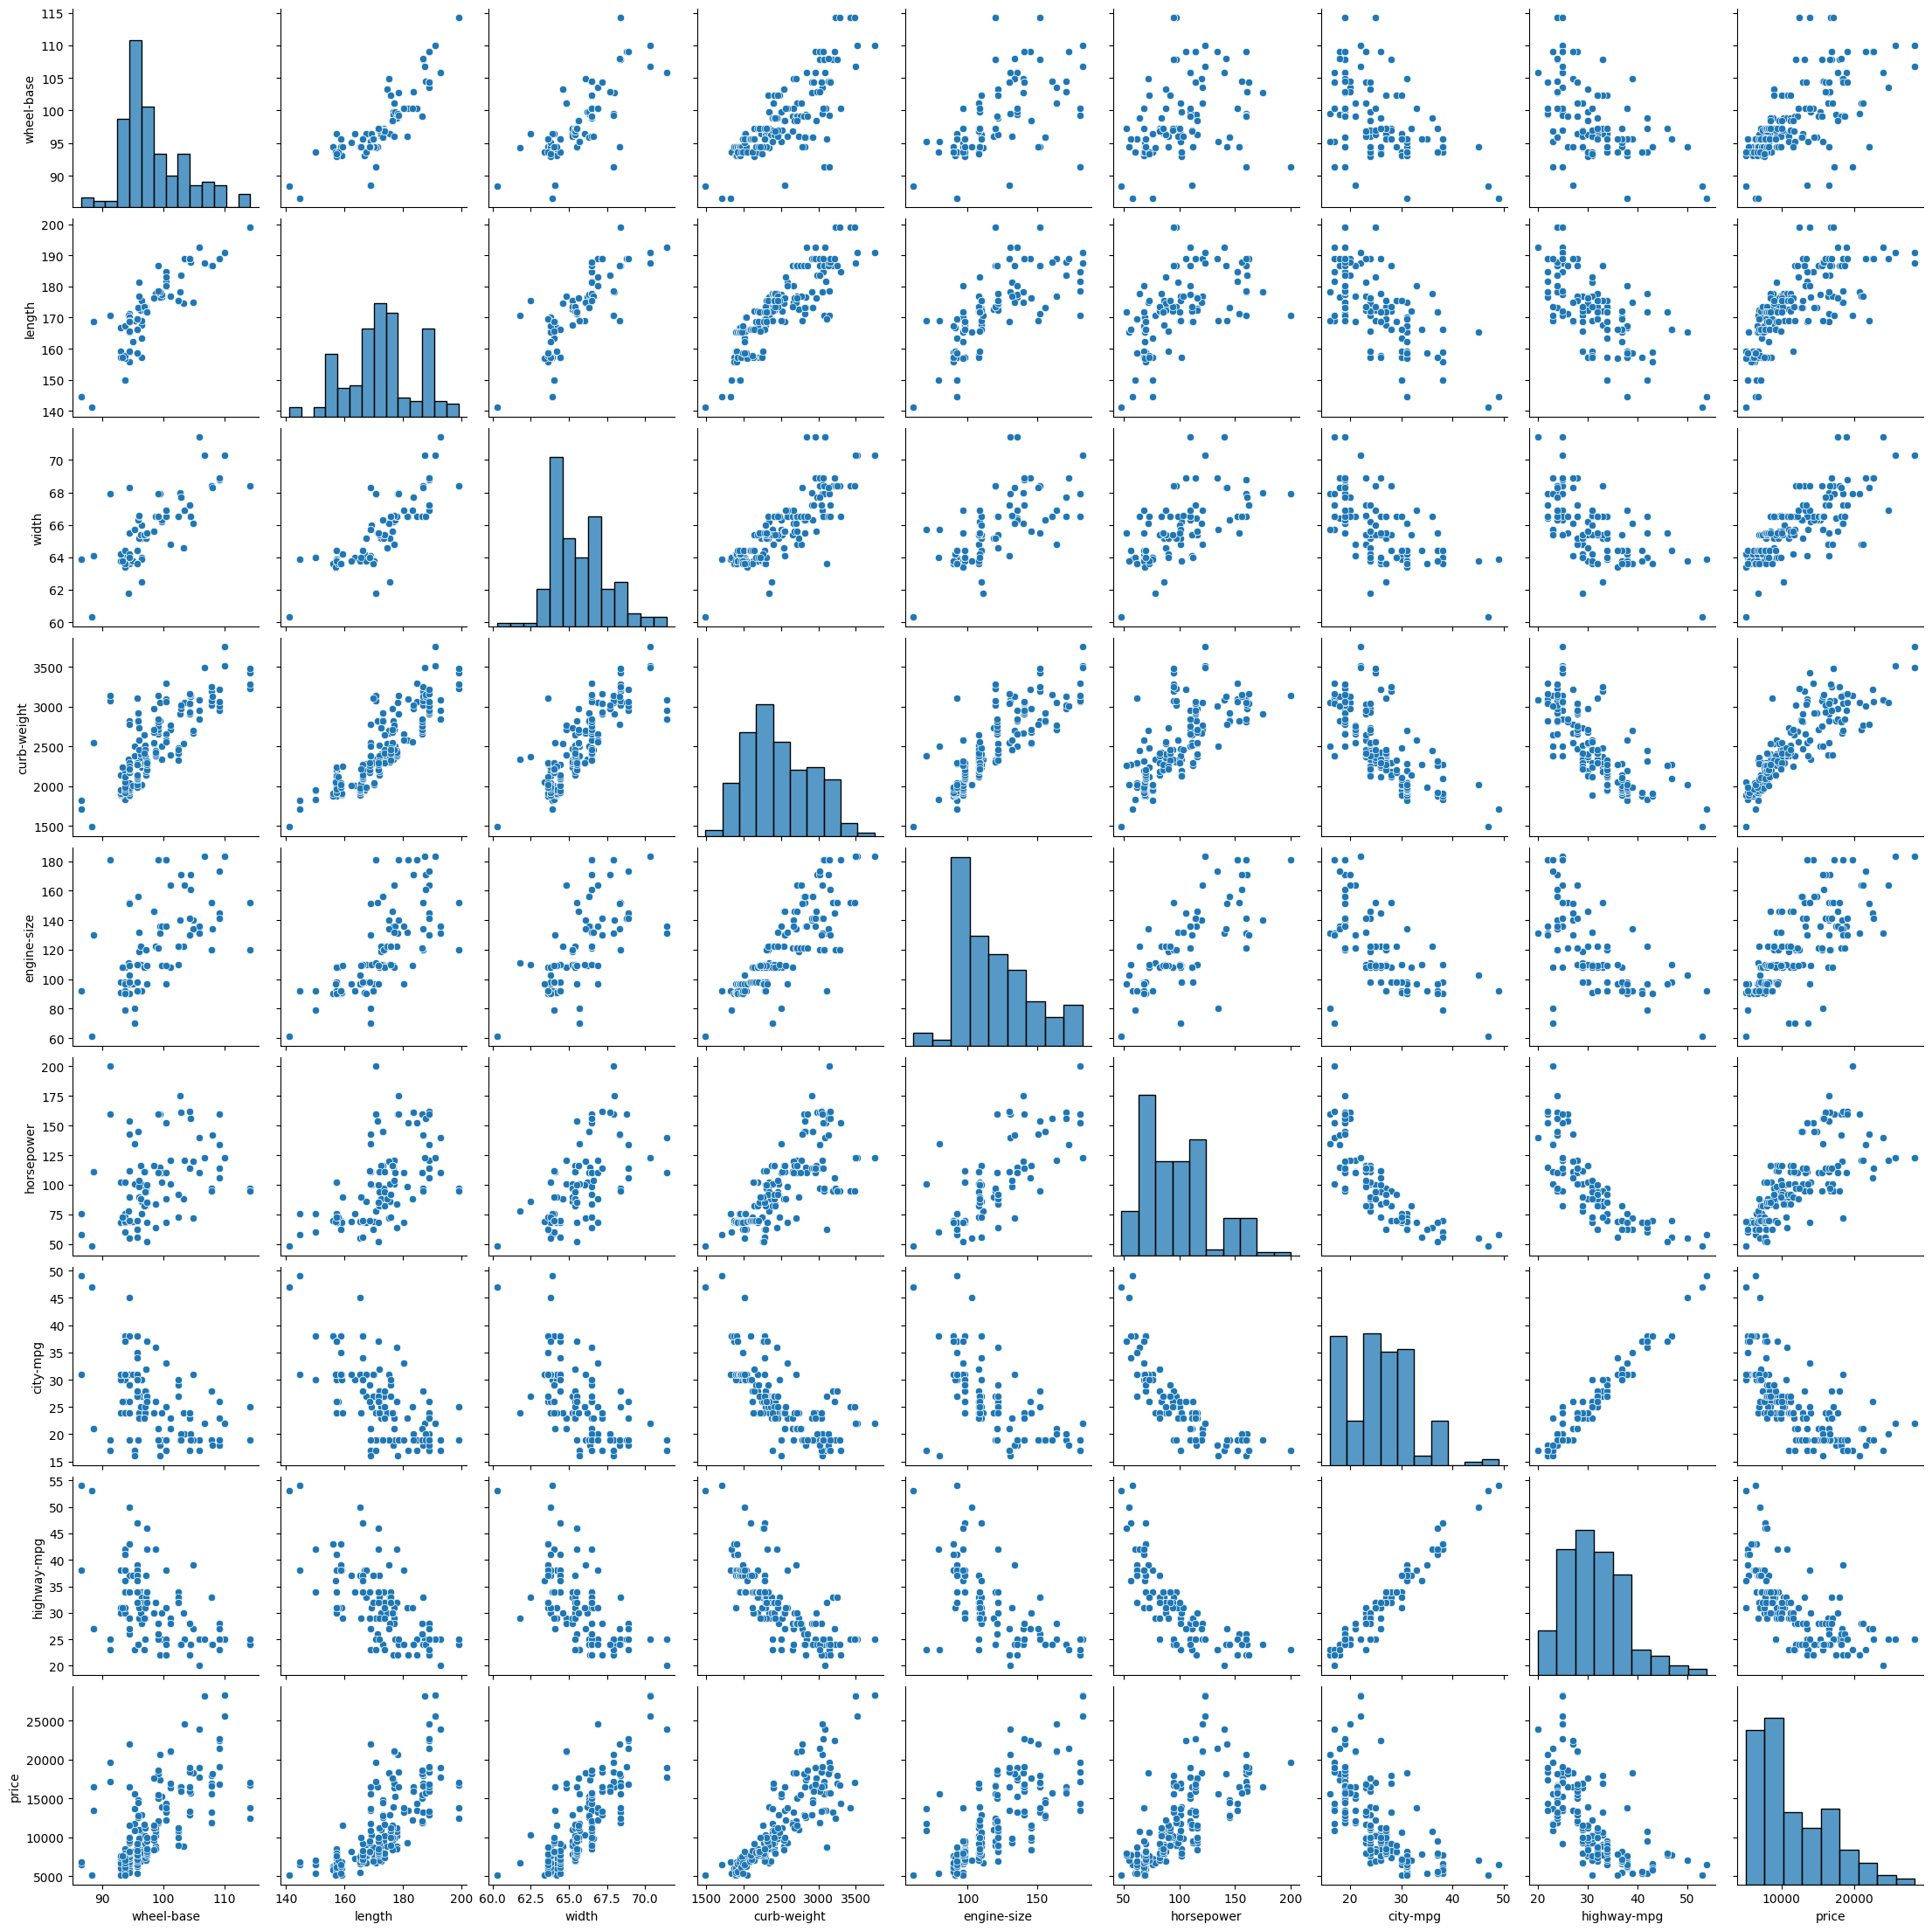

In [488]:
# Distribución por pares de variables (usando un pairplot)

# Paso 1: Filtra las variables que tienen una correlación alta (por ejemplo, superior a 0.6 en valor absoluto) Se debe ajustar segun necesidad
threshold = 0.7
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Paso 2: Selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Paso 3: Genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df_limpio[correlated_vars]) # Muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

### Entrenamiento de modelos

In [489]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df_limpio.drop(["price"], axis=1) # Features
y = df_limpio["price"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [ ]:
# LINEAR REGRESSION

# Crear un Pipeline completo
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_lr.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_lr = pipeline_lr.predict(X_test)

# Calcular la precisión del modelo
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Resultado del R2 de Linear Regression: {r2_lr}")
print(f"Resultado del MSE de Linear Regression: {mse_lr}")

Resultado del R2 de Linear Regression: 0.8975905383332469
Resultado del MSE de Linear Regression: 1904815.8201621273


In [ ]:
# Entrenamiento del modelo KNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Crear un Pipeline con el preprocesador y el regressor
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Asegúrate de tener el preprocesador definido
    ('knn', KNeighborsRegressor())  # Aquí inicializamos el modelo KNN sin el parámetro 'n_neighbors'
])

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    # Ajustar el número de vecinos en cada iteración
    pipeline_knn.set_params(knn__n_neighbors=k)
    
    # Validación cruzada con 5 pliegues
    scores = cross_val_score(pipeline_knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    
    # Guardar el promedio del MSE (recuerda que cross_val_score devuelve negativos)
    mse_scores.append(np.mean(scores))

# Seleccionar el K con el menor MSE (máximo valor negativo)
best_k = k_values[np.argmax(mse_scores)]
print(f'Mejor valor de K: {best_k}')

# Ahora, usa el mejor K encontrado para entrenar el modelo final
pipeline_knn.set_params(knn__n_neighbors=best_k)
pipeline_knn.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_knn = pipeline_knn.predict(X_test)

# Calcular y mostrar las métricas
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Resultado del R2 del KNN: {r2_knn}")
print(f"Resultado del MSE del KNN: {mse_knn}")

Mejor valor de K: 1
Resultado del R2 del KNN: 0.86441642134462
Resultado del MSE del KNN: 2521854.3421052634


In [493]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor

# Crear un Pipeline completo
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(random_state=0))
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_dt.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_dt = pipeline_dt.predict(X_test)

# Calcular la precisión del modelo
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Resultado del R2 de Linear Regression: {r2_dt}")
print(f"Resultado del MSE de Linear Regression: {mse_dt}")

Resultado del R2 de Linear Regression: 0.8741279629422658
Resultado del MSE de Linear Regression: 2341219.6842105263


In [494]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree'],
    'R2': [r2_lr, r2_knn, r2_dt],
    'MSE': [mse_lr, mse_knn, mse_dt]
})

# Imprimir los resultados
print(results)

               Model        R2           MSE
0  Linear Regression  0.897591  1.904816e+06
1                KNN  0.864416  2.521854e+06
2      Decision Tree  0.874128  2.341220e+06


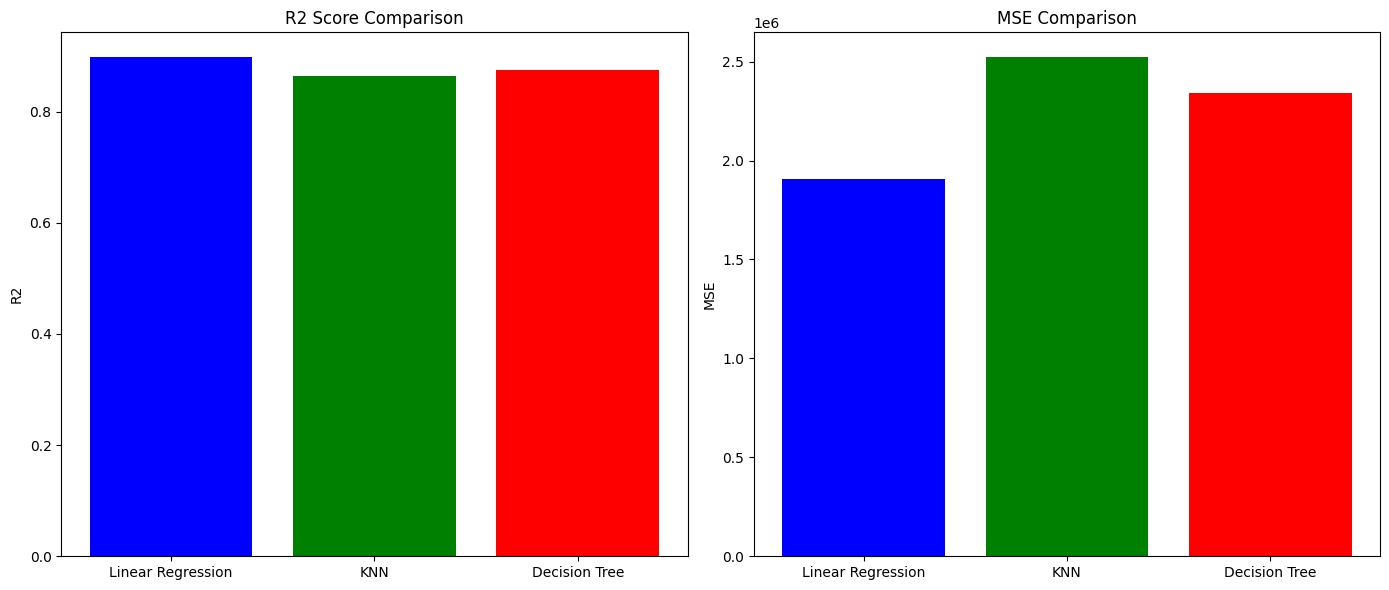

In [495]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Graficar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de R2
ax[0].bar(results['Model'], results['R2'], color=['blue', 'green', 'red'])
ax[0].set_title('R2 Score Comparison')
ax[0].set_ylabel('R2')

# Gráfico de MSE
ax[1].bar(results['Model'], results['MSE'], color=['blue', 'green', 'red'])
ax[1].set_title('MSE Comparison')
ax[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()

In [496]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_lr = measure_training_time(pipeline_lr, X_train, y_train)
time_knn = measure_training_time(pipeline_knn, X_train, y_train)
time_dt = measure_training_time(pipeline_dt, X_train, y_train)

# Agregar el tiempo al DataFrame
results['Training Time (s)'] = [time_lr, time_knn, time_dt]

# Imprimir los resultados con tiempo de entrenamiento
print(results)

               Model        R2           MSE  Training Time (s)
0  Linear Regression  0.897591  1.904816e+06           0.012738
1                KNN  0.864416  2.521854e+06           0.007377
2      Decision Tree  0.874128  2.341220e+06           0.010072


### CONCLUSION

El modelo con el mejor resultado es el Linear Regression con un R2 de 0.90 y un MSE significativamente menor a los otros 2 modelos.
De igual manera los otros 2 modelos tampoco son malos, pero siempre es mejor asegurar e ir por el modelo con menor margen de error.